# Monkey Classification Pytorch

### Libraries

In [3]:
os.chdir('/Users/martaplonka/Documents/DeepLearning/MonkeysKaggle')

In [1]:
import os

In [4]:
from torchvision import transforms, datasets
from torchvision.datasets import ImageFolder
import torch.utils.data as data

from matplotlib.pyplot import imshow

import src.dataset.RandomImage as rI

### Data import and preprocessing training and test sets

In [5]:
BATCH_SIZE = 1000

In [6]:
preprocessing = transforms.Compose([
                transforms.RandomResizedCrop(50, scale=(0.5, 1.0)),
                transforms.RandomHorizontalFlip(),
                transforms.ToTensor(),
                transforms.Normalize(0, 1)
            ])

In [7]:
train_data = datasets.ImageFolder('/Users/martaplonka/Documents/DeepLearning/MonkeysKaggle/data/training/training', transform = preprocessing)
train_data_loader = data.DataLoader(train_data, batch_size=BATCH_SIZE, shuffle=True,  num_workers=4)

In [8]:
test_data = datasets.ImageFolder('/Users/martaplonka/Documents/DeepLearning/MonkeysKaggle/data/validation/validation', transform = preprocessing)
test_data_loader = data.DataLoader(test_data, batch_size=BATCH_SIZE, shuffle=True,  num_workers=4)

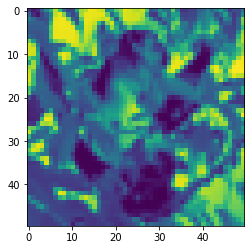

In [9]:
x, _ = train_data[10] 
imshow(x.numpy()[0])

y = 1-erythrocebus_patas


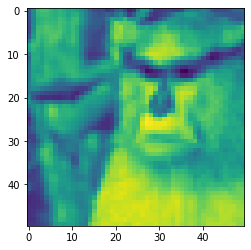

In [10]:
rI.get_random_monkey(train_data, random = True, cat_num = None, pic_num = None)

In [11]:
train_data

Dataset ImageFolder
    Number of datapoints: 1097
    Root location: /Users/martaplonka/Documents/DeepLearning/MonkeysKaggle/data/training/training
    StandardTransform
Transform: Compose(
               RandomResizedCrop(size=(50, 50), scale=(0.5, 1.0), ratio=(0.75, 1.3333), interpolation=PIL.Image.BILINEAR)
               RandomHorizontalFlip(p=0.5)
               ToTensor()
               Normalize(mean=0, std=1)
           )

In [12]:
train_data_loader

In [13]:
train_data[10]

(tensor([[[0.2784, 0.3412, 0.4078,  ..., 0.1373, 0.1412, 0.1333],
          [0.2784, 0.3765, 0.4627,  ..., 0.1725, 0.1569, 0.1216],
          [0.4078, 0.3490, 0.4353,  ..., 0.2196, 0.2039, 0.1529],
          ...,
          [0.2353, 0.1451, 0.2235,  ..., 0.2235, 0.2275, 0.2353],
          [0.2471, 0.1451, 0.1333,  ..., 0.2275, 0.2275, 0.2431],
          [0.5294, 0.2275, 0.0784,  ..., 0.2235, 0.2314, 0.2510]],
 
         [[0.2941, 0.3529, 0.4549,  ..., 0.1608, 0.1412, 0.1412],
          [0.2941, 0.3922, 0.4902,  ..., 0.2235, 0.1686, 0.1216],
          [0.4196, 0.3725, 0.4627,  ..., 0.2863, 0.2549, 0.1608],
          ...,
          [0.2431, 0.1569, 0.2471,  ..., 0.2863, 0.2824, 0.2941],
          [0.2471, 0.1569, 0.1490,  ..., 0.2863, 0.2824, 0.2980],
          [0.5412, 0.2431, 0.0784,  ..., 0.2824, 0.2863, 0.3020]],
 
         [[0.0627, 0.0941, 0.2118,  ..., 0.0588, 0.0706, 0.0667],
          [0.0745, 0.0824, 0.1176,  ..., 0.0667, 0.0745, 0.0667],
          [0.2314, 0.1176, 0.0863,  ...,

Size of traning example

In [14]:
train_data[10][0].shape

torch.Size([3, 50, 50])

W traning datasetcie tuple, tensor obrazka + labelka

In [15]:
import torch.nn.functional as F
from torch import nn
from torch import optim
import torch

In [22]:
class NeuralNet(nn.Module):
    def __init__(self):
        super(NeuralNet, self).__init__()
        self.conv1 = nn.Conv2d(3,3,3,1)
        self.conv2 = nn.Conv2d(3,3,3,1)
        self.fc1 = nn.Linear(1587, 128)
        self.fc2 = nn.Linear(128, 10)
    def forward(self,x):
        x=self.conv1(x)
        x=F.relu(x)
        x=self.conv2(x)
        x=F.relu(x)
        x=F.max_pool2d(x,2)
        x = torch.flatten(x, 1)
        x = self.fc1(x)
        x = F.relu(x)
        x = self.fc2(x)
        output = F.log_softmax(x, dim=1)
        return output

In [23]:
NeuralNet()

NeuralNet(
  (conv1): Conv2d(3, 3, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(3, 3, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=1587, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=10, bias=True)
)

In [24]:
model = NeuralNet()
optimizer = optim.Adam(model.parameters())
for e in range(10):
    model.train()
    for (i,l) in train_data_loader:
        optimizer.zero_grad()
        #data = i.view(i.size(0), -1)
        output = model(i)
        loss = F.nll_loss(output, l)
        loss.backward()
        optimizer.step()
        
    model.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in test_data_loader:
            output = model(data)
            test_loss += F.nll_loss(output, target, 
                         reduction='sum').item() 
            pred = output.argmax(dim=1, keepdim=True)  
            correct += pred.eq(target.view_as(pred)).sum().item()
    test_loss /= len(test_data_loader.dataset)
    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, len(test_data_loader.dataset),
        100. * correct / len(test_data_loader.dataset)))


Test set: Average loss: 2.3006, Accuracy: 30/272 (11%)


Test set: Average loss: 2.2995, Accuracy: 30/272 (11%)


Test set: Average loss: 2.2990, Accuracy: 30/272 (11%)


Test set: Average loss: 2.2981, Accuracy: 30/272 (11%)


Test set: Average loss: 2.2965, Accuracy: 30/272 (11%)


Test set: Average loss: 2.2939, Accuracy: 30/272 (11%)


Test set: Average loss: 2.2885, Accuracy: 30/272 (11%)


Test set: Average loss: 2.2855, Accuracy: 30/272 (11%)


Test set: Average loss: 2.2769, Accuracy: 30/272 (11%)


Test set: Average loss: 2.2651, Accuracy: 30/272 (11%)

